# Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### From sklearn - Preprocesing 

from sklearn import preprocessing

# Dimension reduction 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Clustering 
from sklearn.manifold import TSNE

# K-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split 

# From sklearn - Model creation

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix

from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

-----
# Reading files and merging features with labels

In [113]:
#dataset = pd.read_csv("Genes\data.csv")
dataset = pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/data.csv')

#labels = pd.read_csv("Genes\labels.csv")
dataset_labels =pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/labels.csv')

In [114]:
# Merging both datasets and removing first column

dataset = pd.merge(dataset, dataset_labels, on='Unnamed: 0').drop("Unnamed: 0", axis=1)

In [115]:
print(f'Dataset consists of {dataset.shape[0]} input sample vectors, each vector has {dataset.shape[1]} '\
      f'gene features.\nAlso the availbale classes are {len(dataset["Class"].unique())}.'\
      f' The possible choises are {", ".join(val for val in dataset.Class.unique())}.')
class_counts = dataset.Class.value_counts()
print(f'As we can see, we have class imbalance.\n\n{class_counts.to_string()}')

Dataset consists of 801 input sample vectors, each vector has 20532 gene features.
Also the availbale classes are 5. The possible choises are PRAD, LUAD, BRCA, KIRC, COAD.
As we can see, we have class imbalance.

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78


----
# Preprocesing data

###  Encode the labels of the dataset

In [116]:
# Encode the labels and updaate values

le = preprocessing.LabelEncoder()

dataset["Class"] = le.fit_transform(dataset_labels.drop("Unnamed: 0", axis=1).values.ravel())

In [117]:
# Let´s store all the labels

keys = le.classes_

# And now store labels with their encoded value 

values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

### Normalize the dataset



In [118]:
# Lets store the dataset values without the columns titles
x = dataset.iloc[:, :-1].values 

In [119]:
# Let´s create an instance with the normalice function
min_max_scaler = preprocessing.MinMaxScaler()

# Let´s fit the normilice function
x_scaled = min_max_scaler.fit_transform(x)

# Let´s put in the dataframe the values scaled
dataset.iloc[:, :-1] = pd.DataFrame(x_scaled)

In [120]:
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

Number of examples of each label:

In [121]:
dataset.Class.value_counts()

0    300
2    146
3    141
4    136
1     78
Name: Class, dtype: int64


### Dimensionality reduction:  1.Principal Component Analysis

In [122]:
# Create PCA object to keep 95% of variance

pca = PCA(0.75)

# Apply PCA in input vector
pca.fit(dataset.iloc[:,:-1]) 

# Save results in an np.array
reduced = pca.transform(dataset.iloc[:,:-1])

# Save labels in an np.array
x = dataset['Class'].to_numpy()

In [123]:
# Create final dataframe with reduced dimensions
dataset_reduced_PCA = pd.DataFrame(np.column_stack((reduced, x)))

Number of features in the original dataset: 20532 <br>
After applying PCA to the dataset, we end up with:

In [124]:
dataset_reduced_PCA.shape[1]

103

In [125]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_PCA.columns):
    
    if count < len(dataset_reduced_PCA.columns)-1:
        
        dataset_reduced_PCA.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_PCA.rename(columns={column_name : "Label"}, inplace=True)

The dataset after applying the PCA analysis has the following form:

In [126]:
dataset_reduced_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,PCA101,PCA102,Label
0,-5.668141,-8.872139,15.853290,-6.659908,3.244882,3.529868,-0.186630,-4.599118,-0.780447,1.000318,...,-0.091763,0.377116,-0.012125,-1.028643,-0.541357,0.640421,-0.258044,0.735037,-0.348108,4.0
1,-1.470204,10.280182,-1.246634,-1.597277,-5.053639,5.329966,-3.213423,0.646405,-0.092015,-5.155488,...,0.272916,-0.660396,0.238561,-0.612262,-0.117655,0.256274,-1.781133,-0.576626,-0.847453,3.0
2,-10.845387,-1.345352,4.000770,8.010467,3.520304,6.439937,-2.008366,7.852581,-0.221889,-4.103816,...,-0.789400,-2.298390,0.443170,-0.151047,0.803538,0.055863,0.574898,0.244420,0.034691,4.0
3,-9.167961,-8.670123,5.481483,5.505311,-0.453232,4.098163,-2.687572,2.294694,-0.065617,-2.497998,...,0.040757,1.105573,-0.350252,0.418292,-1.065557,-0.098885,-0.457159,0.283911,0.846548,4.0
4,-6.271848,-3.101208,-7.338976,0.433540,4.290824,-0.316748,-0.306964,-1.433246,-3.194915,4.058295,...,-0.966648,-0.663006,-0.299178,1.052884,1.381582,0.461015,0.655713,-0.593092,-0.139704,0.0


### Output of preprocesing 

In [127]:
dataset_reduced_PCA.shape

(801, 103)

--------------
# Model Implementation:  KNN

###  80% Training data, 20% test data

In [348]:
#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [349]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [357]:
error = []

# Calculating error for nº neighbors

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    preds = knn.predict(X_test)
    
    squared_error = np.power(y_test - preds,2)
    error.append(np.mean(squared_error))

Text(0, 0.5, 'Mean Squared Error.')

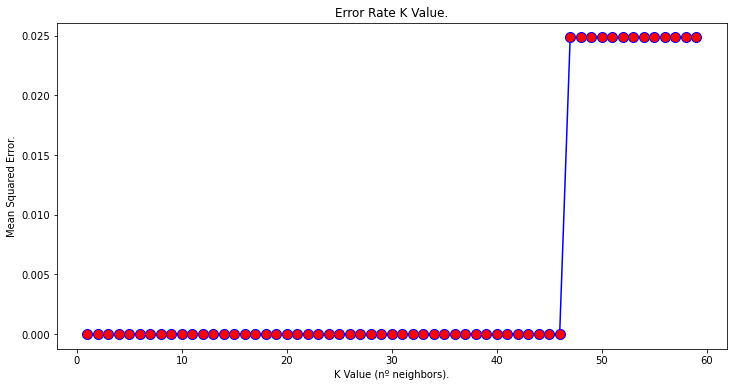

In [358]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value.')
plt.xlabel('K Value (nº neighbors).')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [359]:
# Build and train the model with the value selected: k= 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [360]:
# We predict the labels of the test data
y_pred = KNN.predict(X_test)

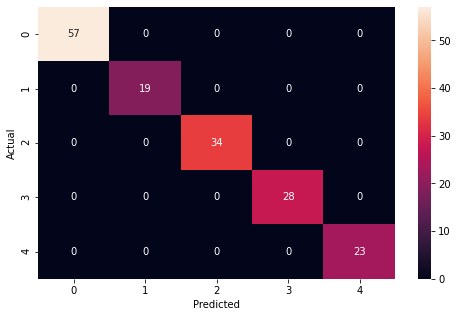

In [361]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [362]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

1.0

In [363]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:1.0


In [364]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        28
         4.0       1.00      1.00      1.00        23

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



### Stratified Kfold

In [365]:
#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [366]:
#Need help to store values and plot Sarandis

scores = []
error = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

for k in range(9, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    
    for i in range(9, 10):
        knn = KNeighborsClassifier(n_neighbors=i)
               
        for train_index, test_index in folds.split(input_data,label_data):
            X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
            
            scores.append(get_score(knn, X_train, X_test, y_train, y_test))
            
            preds = knn.predict(X_test)
            squared_error = np.power(y_test - preds,2)
            error.append(np.mean(squared_error))
            
# Help with the plot

In [367]:
# After studying the optimal parameters, we run the model with the selected ones

knn = KNeighborsClassifier(n_neighbors=10)
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(knn, X_train, X_test, y_train, y_test))


In [368]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = knn.predict(X_test)

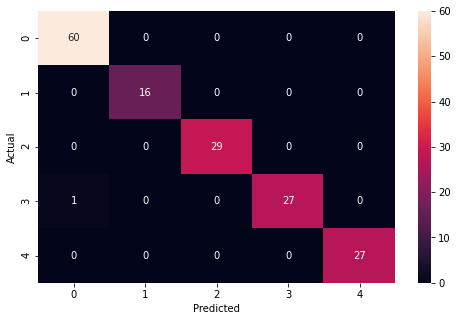

In [369]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [370]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.99375

In [371]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.99375


In [372]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        60
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        29
         3.0       1.00      0.96      0.98        28
         4.0       1.00      1.00      1.00        27

    accuracy                           0.99       160
   macro avg       1.00      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



--------
# Model Implementation: Logistic regression

###  80% Training data, 20% test data

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

In [373]:
#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [374]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [375]:
# Building and training the model
LR = LogisticRegression() # Parameters to tune?
LR.fit(X_train, y_train)

LogisticRegression()

In [376]:
# We predict the labels of the test data
y_pred = LR.predict(X_test)

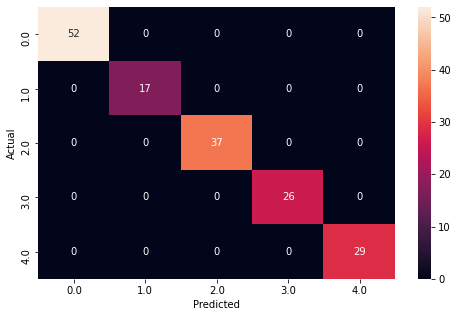

In [377]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [378]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

1.0

In [379]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:1.0


In [380]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        37
         3.0       1.00      1.00      1.00        26
         4.0       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



### Stratified Kfold

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

In [381]:
#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [384]:
score_average = []
error_average = []

k_values = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

LR = LogisticRegression() # Parameters to tune?

for k in range(5, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    k_values.append(k)
    error = []
    scores = []
                   
    for train_index, test_index in folds.split(input_data,label_data):
        X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
        
        scores.append(get_score(LR, X_train, X_test, y_train, y_test))
        
        preds = LR.predict(X_test)
        squared_error = np.power(y_test - preds,2)
        error.append(np.mean(squared_error))
        
    error_average.append(np.mean(error))
    score_average.append(round(np.mean(scores),4))

In [385]:
print(np.mean(average_score))

0.9987515605493135


Text(0, 0.5, 'Mean Score.')

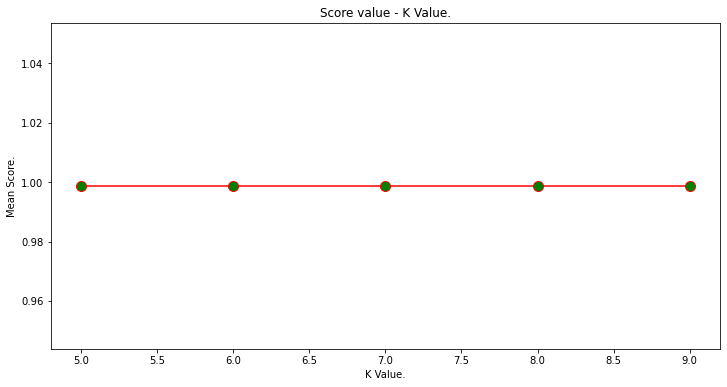

In [388]:
#SCORE PLOT
plt.figure(figsize=(12, 6))
#plt.plot(k_values, error_average, color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Score value - K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Score.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

Text(0, 0.5, 'Mean Squared Error.')

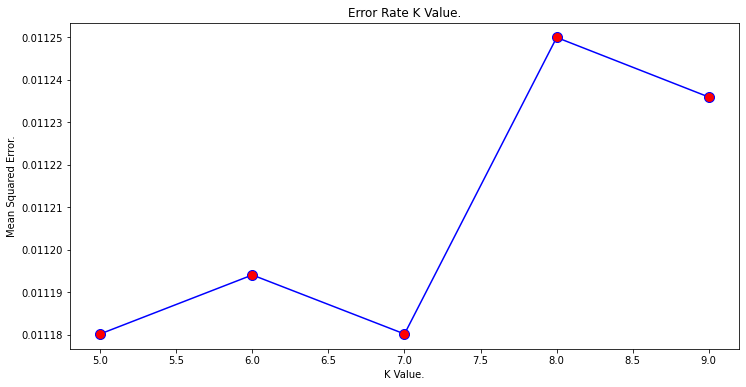

In [389]:
#SQUARE ERROR PLOT
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_average, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [391]:
# After studying the optimal parameters, we run the model with the selected ones

k = 5

LR = LogisticRegression() # Parameters to tune?

folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(LR, X_train, X_test, y_train, y_test))

print(np.mean(scores))

0.9987577639751553


In [392]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = LR.predict(X_test)

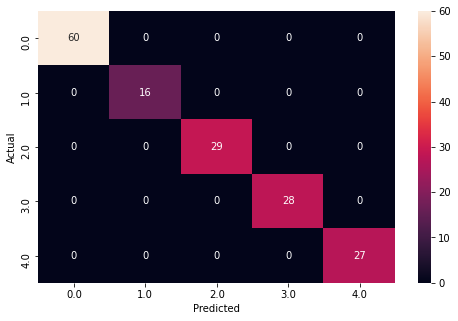

In [393]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [394]:
# Accuracy of the model --> This is just for this iteration, the real score is the mean of all the scores
metrics.accuracy_score(y_test, y_pred)

1.0

In [395]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:1.0


In [396]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        29
         3.0       1.00      1.00      1.00        28
         4.0       1.00      1.00      1.00        27

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



--------------
# Model Implementation: Decision Tree

###  80% Training data, 20% test data

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

In [283]:
#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [284]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [288]:
# Creating model and predicting output values on testing data.
DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

In [289]:
# We predict the labels of the test data
y_pred = DT.predict(X_test)

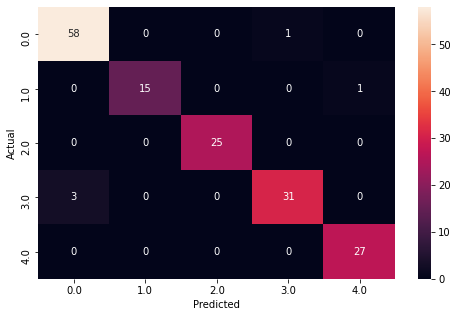

In [290]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [291]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.968944099378882

In [292]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.968944099378882


In [293]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        59
         1.0       1.00      0.94      0.97        16
         2.0       1.00      1.00      1.00        25
         3.0       0.97      0.91      0.94        34
         4.0       0.96      1.00      0.98        27

    accuracy                           0.97       161
   macro avg       0.98      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



### Stratified Kfold

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

In [400]:
#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [406]:
error_average = []
score_average = []

k_values = []


def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

DT = DecisionTreeClassifier() # Parameters to tune?

for k in range(5, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    k_values.append(k)
    error = []
    scores = []
                   
    for train_index, test_index in folds.split(input_data,label_data):
        X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
        
        scores.append(get_score(DT, X_train, X_test, y_train, y_test))
        
        preds = DT.predict(X_test)
        squared_error = np.power(y_test - preds,2)
        error.append(np.mean(squared_error))
        
    error_average.append(np.mean(error))
    score_average.append(round(np.mean(scores),4))
    


Text(0, 0.5, 'Mean Score.')

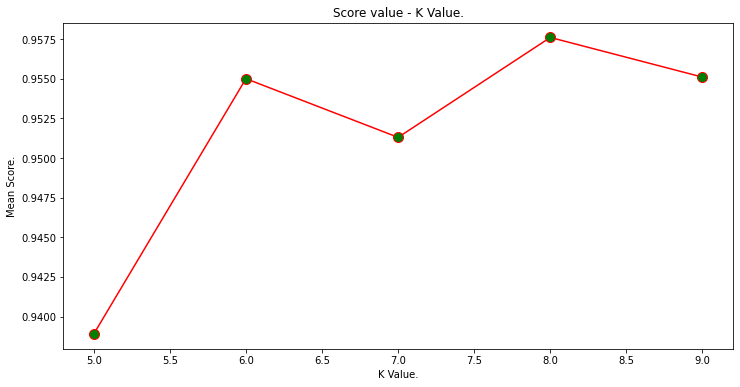

In [407]:
#SCORE PLOT
plt.figure(figsize=(12, 6))
#plt.plot(k_values, error_average, color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Score value - K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Score.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

Text(0, 0.5, 'Mean Squared Error.')

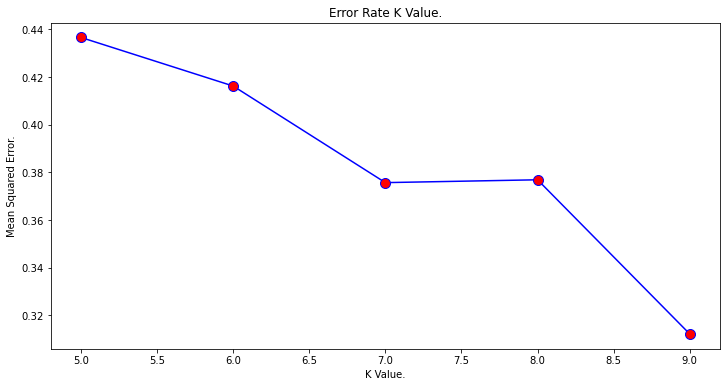

In [408]:
#SQUARE ERROR PLOT
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_average, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [410]:
# After studying the optimal parameters, we run the model with the selected ones

k = 10

DT = DecisionTreeClassifier() # Parameters to tune?

folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(DT, X_train, X_test, y_train, y_test))

print(np.mean(scores))

0.9550925925925926


In [411]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = DT.predict(X_test)

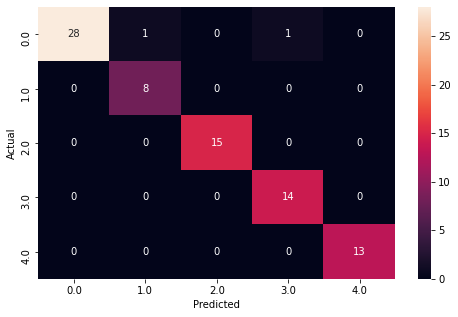

In [412]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [413]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.975

In [414]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.975


In [415]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        30
         1.0       0.89      1.00      0.94         8
         2.0       1.00      1.00      1.00        15
         3.0       0.93      1.00      0.97        14
         4.0       1.00      1.00      1.00        13

    accuracy                           0.97        80
   macro avg       0.96      0.99      0.97        80
weighted avg       0.98      0.97      0.98        80



### Decision Tree layout

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = final_df.columns[:-1], class_names=final_df.Label.unique().astype(str))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Image(graph.create_png())

In [ ]:
#cf = multilabel_confusion_matrix(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])

In [ ]:
#lda = LinearDiscriminantAnalysis(n_components=3)
#x_r2 = lda.fit(final_df.iloc[:, :-1], final_df.Label).transform(dataset.iloc[:, :-1])

In [ ]:
#corr = dataset.iloc[0:30, 0:30].corr()
#f, ax = plt.subplots(figsize=(14, 10))
#hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)